# Loan Data from Prosper
(Last updated 03/11/2014)
## by Iman Babaei

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. There is also a data dictionary explaining all the variables in the data set. From all these variables the following 16 were choosen for explorations of the the outcome status and  borrower’s APR or interest rate.


* **Term** : The length of the loan expressed in months.
* **LoanOriginalAmount** : The origination amount of the loan.
* **LoanOriginationDate** : The date the loan was originated.
* **MonthlyLoanPayment** : The scheduled monthly loan payment.
* **LoanStatus** : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
* **BorrowerAPR** : The Borrower's Annual Percentage Rate (APR) for the loan.
* **BorrowerRate** : The Borrower's interest rate for this loan. 
* **StatedMonthlyIncome** : The monthly income the borrower stated at the time the listing was created.
* **ProsperRating (Alpha)** : The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
* **EmploymentStatus** : The employment status of the borrower at the time they posted the listing.
* **BorrowerState** : The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
* **ListingCategory (numeric)** : The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
* **IsBorrowerHomeowner** : A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* **CreditScoreRangeLower** : The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
* **CreditScoreRangeUpper** : The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
* **IncomeRange** : The income range of the borrower at the time the listing was created.
* **Occupation** : The Occupation selected by the Borrower at the time they created the listing.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')
#Just to hide warnings when I put inplace = True or change a columns and save it at the same time


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df_raw = pd.read_csv('prosperLoanData.csv')
print(df_raw.shape)
print(df_raw.columns)

(113937, 81)
Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
 

In [3]:
#First I choose the Interesting columns for further investigations.
columns_ofInterest = ['Term', 'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment', 'BorrowerAPR','BorrowerRate',\
                      'StatedMonthlyIncome', 'ProsperRating (Alpha)', 'EmploymentStatus', 'BorrowerState', \
                      'ListingCategory (numeric)', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',\
                      'IncomeRange', 'Occupation', 'LoanStatus']
df_loan = df_raw[columns_ofInterest]

In [4]:
# descriptive statistics for numeric variables
print(df_loan.describe())

                Term  LoanOriginalAmount  MonthlyLoanPayment    BorrowerAPR  \
count  113937.000000        113937.00000       113937.000000  113912.000000   
mean       40.830248          8337.01385          272.475783       0.218828   
std        10.436212          6245.80058          192.697812       0.080364   
min        12.000000          1000.00000            0.000000       0.006530   
25%        36.000000          4000.00000          131.620000       0.156290   
50%        36.000000          6500.00000          217.740000       0.209760   
75%        36.000000         12000.00000          371.580000       0.283810   
max        60.000000         35000.00000         2251.510000       0.512290   

        BorrowerRate  StatedMonthlyIncome  ListingCategory (numeric)  \
count  113937.000000         1.139370e+05              113937.000000   
mean        0.192764         5.608026e+03                   2.774209   
std         0.074818         7.478497e+03                   3.996797   


### What is the structure of your dataset?

> There are 113937 rows in this dataset with 17 variables out of which 9 are numerical.

### What is/are the main feature(s) of interest in your dataset?

> Finding out which aspects mainly affect the borrowers Annual Percentage Rate or interest rate. And also trying to see what features share the same status of the loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I imagine borrowers income, loan term, prosper rating, and credit score ranges affect the interest rate.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [5]:
#I do not like the fact that there is a space in the name of column. So First Rename!
df_loan.rename(columns={"ProsperRating (Alpha)": "ProsperRating"}, inplace = True)
df_loan.ProsperRating.value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

In [6]:
#To make ProsperRating an ordered categorical column
order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered = pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_loan.ProsperRating = df_loan.ProsperRating.astype(ordered)

In [7]:
#To make IncomeRange an ordered categorical column
order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',\
         '$75,000-99,999', '$100,000+', 'Not displayed']
ordered = pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_loan.IncomeRange = df_loan.IncomeRange.astype(ordered)

In [8]:
df_loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

> * "*A charge-off or chargeoff is a declaration by a creditor that an amount of debt is unlikely to be collected.*" "*In finance, default is failure to meet the legal obligations of a loan.*" So I will put them in the same category.
> * All the past dues in the same categort "Past Due"
> * FinalPaymentInProgress will be treated as Completed.
> * Cancelled will move to Chargedoff. They are only five so not a big deal to which category they get assigned.              

In [9]:
dic = {'Current' : 'Current',\
       'Completed' : 'Completed',\
       'Chargedoff' : 'Chargedoff',\
       'Defaulted' : 'Chargedoff',\
       'Past Due (1-15 days)' : 'Past Due',\
       'Past Due (31-60 days)' : 'Past Due',\
       'Past Due (61-90 days)' : 'Past Due',\
       'Past Due (91-120 days)': 'Past Due',\
       'Past Due (16-30 days)' : 'Past Due',\
       'FinalPaymentInProgress': 'Completed',\
       'Past Due (>120 days)'  : 'Past Due',\
       'Cancelled' : 'Chargedoff'}
df_loan.LoanStatus = df_loan.LoanStatus.map(dic) 

In [10]:
df_loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [11]:
# To make EmploymentStatus an orderred and categorical column
order = ['Employed','Not employed','Self-employed','Full-time','Part-time','Retired','Other', 'Not available']
ordered= pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_loan.EmploymentStatus = df_loan.EmploymentStatus.astype(ordered)

In [12]:
#First rename the name of the column to get rid of the space in it
df_loan.rename(columns={"ListingCategory (numeric)": "ListingCategory"}, inplace = True)

#Then, convert ListingCategory numbers to ordered categorical names using the dictionary of the data.
df_loan.ListingCategory.replace({
    0 : '00-Not Available',  
    1 : '01-Debt Consolidation',
    2 : '02-Home Improvement',
    3 : '03-Business',
    4 : '04-Personal Loan',
    5 : '05-Student Use',
    6 : '06-Auto',
    7 : '07-Other',
    8 : '08-Baby&Adoption',
    9 : '09-Boat',
    10: '10-Cosmetic Procedure',
    11: '11-Engagement Ring',
    12: '12-Green Loans',
    13: '13-Household Expenses',
    14: '14-Large Purchases',
    15: '15-Medical/Dental',
    16: '16-Motorcycle',
    17: '17-RV',
    18: '18-Taxes',
    19: '19-Vacation',
    20: '20-Wedding Loans'}, inplace = True)
df_loan.ListingCategory = df_loan.ListingCategory.astype('category')

In [13]:
#Making Homeowner Status a categorical Yes No columns
df_loan.IsBorrowerHomeowner.replace({True:'Yes',
                                   False: 'No'}, inplace = True)
df_loan.IsBorrowerHomeowner = df_loan.IsBorrowerHomeowner.astype('category')

In [14]:
#Make the data a datetime format
df_loan.LoanOriginationDate = pd.to_datetime(df_loan.LoanOriginationDate)

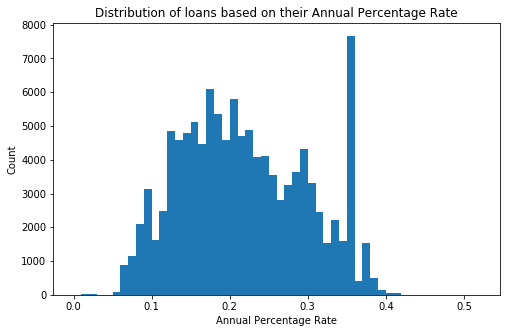

In [15]:
# start with a standard-scaled plot
binsize = 0.01 # After choosing several different binsizes, I found 0.01 is the best descriptive binsize
bins = np.arange(0, df_loan.BorrowerAPR.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Annual Percentage Rate');
plt.ylabel('Count');
plt.title('Distribution of loans based on their Annual Percentage Rate', fontsize = 12);
plt.show()

> Annual Percentage Rate shows more or less a normal distribution with a mean around 19-20% and a pick around 36%.

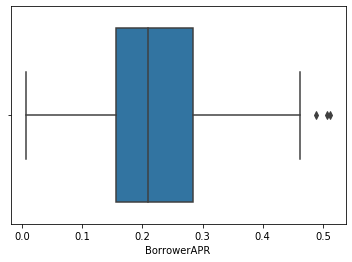

In [16]:
ax = sb.boxplot(x=df_loan.BorrowerAPR)

>The box plot shows that we have only three outliers. Good! 

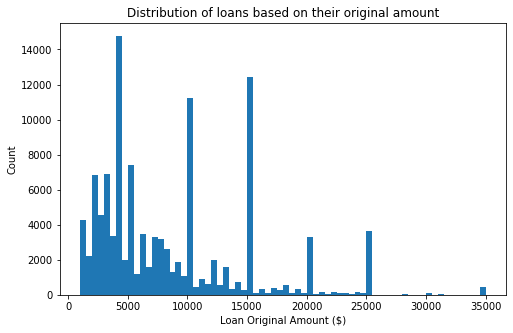

In [17]:
# Checking the distribuition of Loan Original Amount in USD
binsize = 500
bins = np.arange(df_loan.LoanOriginalAmount.min(), df_loan.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount ($)');
plt.ylabel('Count');
plt.title('Distribution of loans based on their original amount', fontsize = 12);
plt.show()

> The picks shows that most of the loans are round numbers like 8000, 9000, etc instead of 8500. Also there are picks at 10000, 15000, 20000, 25000. The averae loan amount is 8337 with third quartile of 12000.

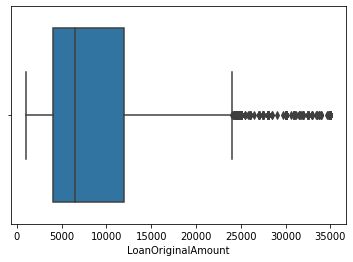

In [18]:
ax = sb.boxplot(x=df_loan.LoanOriginalAmount)

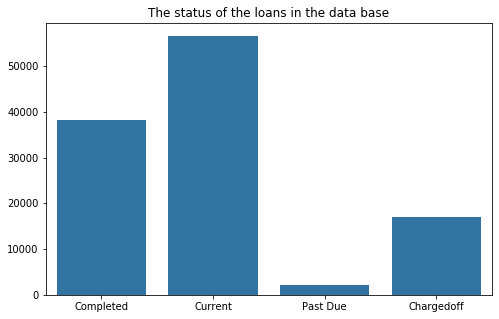

In [19]:
#Status of the loans
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df_loan, x = 'LoanStatus', color = base_color);
plt.title('The status of the loans in the data base', fontsize = 12)
plt.ylabel('');
plt.xlabel('');

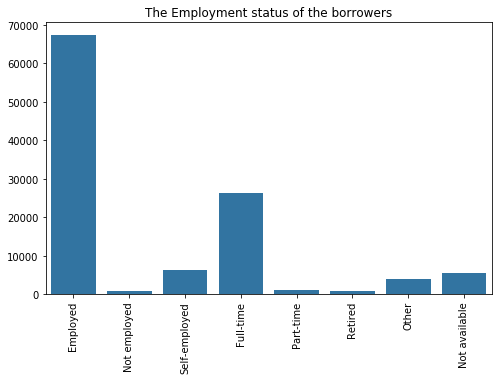

In [20]:
#Employment status of the borrowers 
plt.figure(figsize=[8, 5])
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = base_color);
plt.xticks( rotation = 90);
plt.title('The Employment status of the borrowers', fontsize = 12)
plt.ylabel('');
plt.xlabel('');

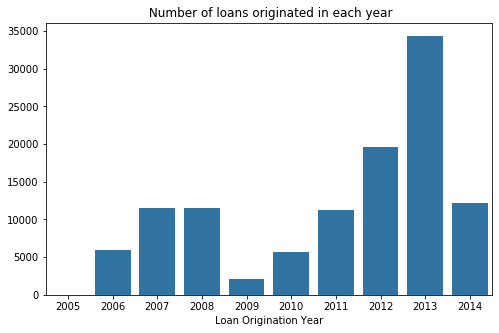

In [21]:
#Origination year of the loans.
plt.figure(figsize=[8, 5])
sb.countplot(data = df_loan, x = df_loan.LoanOriginationDate.dt.year, color = base_color);
plt.title(' Number of loans originated in each year' , fontsize = 12)
plt.ylabel('');
plt.xlabel('Loan Origination Year');

In [22]:
print('There have been only', df_loan[df_loan.LoanOriginationDate.dt.year==2005].shape[0], 'loans originated\
 in 2005. That is why in the above plot it looks almost empty.')

There have been only 22 loans originated in 2005. That is why in the above plot it looks almost empty.


In [23]:
print('There are', df_loan.Occupation.nunique(), 'unique values for the occupation.\nThe top ten occupations are:')
print(df_loan.Occupation.value_counts()[0:10])

There are 67 unique values for the occupation.
The top ten occupations are:
Other                       28617
Professional                13628
Computer Programmer          4478
Executive                    4311
Teacher                      3759
Administrative Assistant     3688
Analyst                      3602
Sales - Commission           3446
Accountant/CPA               3233
Clerical                     3164
Name: Occupation, dtype: int64


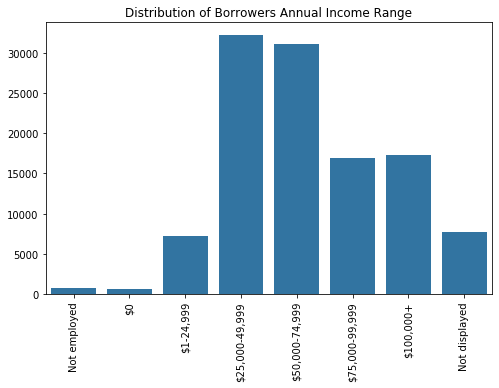

In [24]:
# Annual Income Range
plt.figure(figsize=[8, 5])
sb.countplot(data = df_loan, x = 'IncomeRange', color = base_color);
plt.title('Distribution of Borrowers Annual Income Range', fontsize = 12)
plt.ylabel('');
plt.xlabel('');
plt.xticks(rotation =90);

> Most of the borrowers have annual income between $25,000-75,000

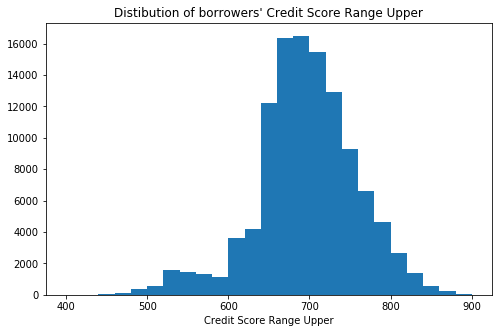

In [25]:
# Checking the distribuition of Credit Score Upper Range of the borrowers
binsize = 20
bins = np.arange(400, df_loan.CreditScoreRangeUpper.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'CreditScoreRangeUpper', bins = bins);
plt.title('Distibution of borrowers\' Credit Score Range Upper', fontsize = 12);
plt.xlabel('Credit Score Range Upper');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions as they are made sense to me and I did not perform any transormations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I made some columns into ordered categorical ones for future distributions. Also changed the date format from sting to datetime format for easier investigation and extraction of the years of the origination of data.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

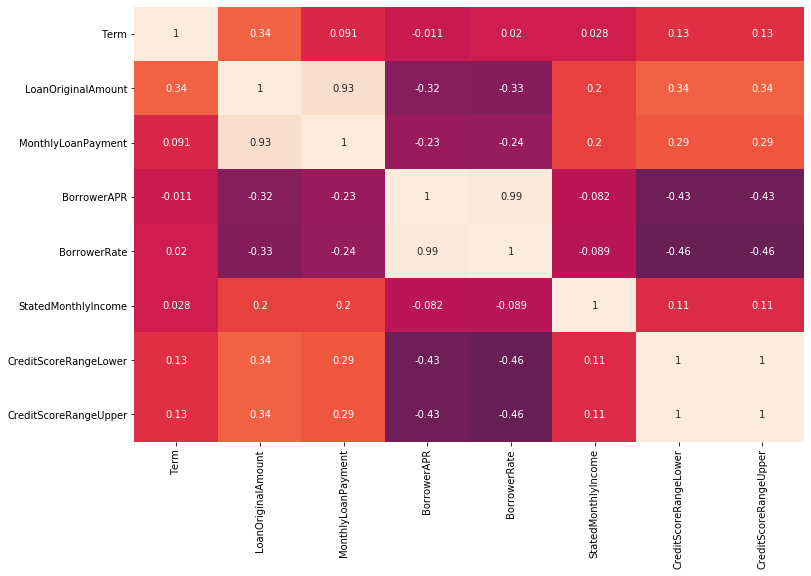

In [26]:
corr = df_loan.corr()
plt.figure(figsize=(12,8))
sb.heatmap(corr, vmin=-1, vmax=1, annot=True, cbar=False);

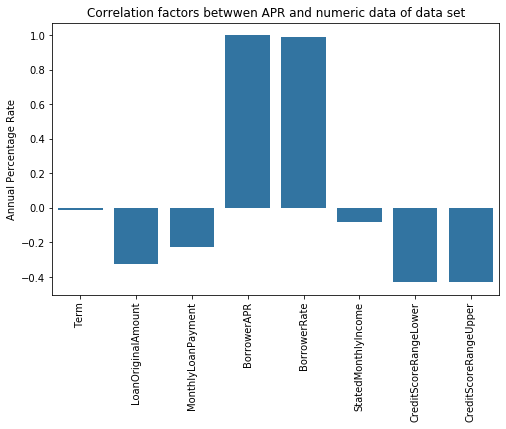

In [27]:
plt.figure(figsize=[8, 5])
x = np.arange(0,8,1)
sb.barplot(data = corr,x=x, y = 'BorrowerAPR',color = base_color);
plt.xticks(x ,corr.columns.tolist(), rotation = 90);
plt.title('Correlation factors betwwen APR and numeric data of data set', fontsize = 12);
plt.ylabel('Annual Percentage Rate');

In [28]:
corr[abs(corr.BorrowerAPR)>0.2].BorrowerAPR

LoanOriginalAmount      -0.322887
MonthlyLoanPayment      -0.226653
BorrowerAPR              1.000000
BorrowerRate             0.989824
CreditScoreRangeLower   -0.429707
CreditScoreRangeUpper   -0.429707
Name: BorrowerAPR, dtype: float64

> From the heatmap and the barplot above, we see that original amount of loan, monthly payment, and credit score have significant negetive correlation with interest rate. In the next blocks of code I will look at these numerical variables and Annual Percentage Rate and then look at the categorical ones to see if there are any visible trends or no.

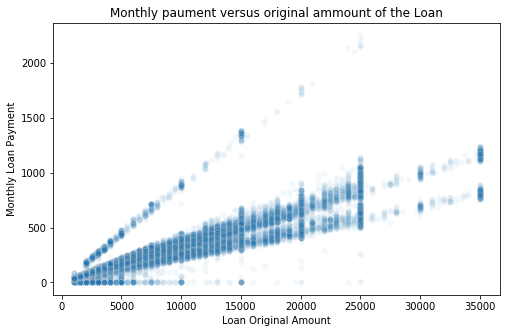

In [29]:
#original amount of loan and monthly payment
plt.figure(figsize=[8, 5])
sb.scatterplot(y="MonthlyLoanPayment", x="LoanOriginalAmount", data=df_loan, alpha = 0.05);
plt.title('Monthly paument versus original ammount of the Loan', fontsize = 12);
plt.xlabel('Loan Original Amount');
plt.ylabel('Monthly Loan Payment');

> The graph shows a huge positive relationship between monthly payment and original amount of the loan which makes sense.

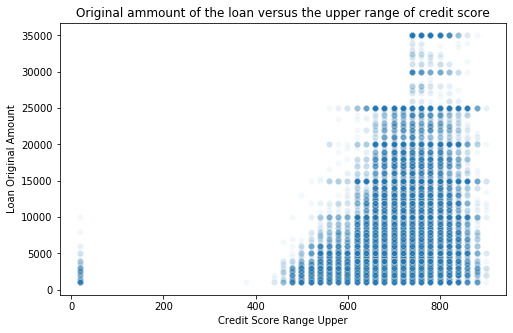

In [30]:
#Loan Original Amount, and credit score
plt.figure(figsize=[8, 5])
sb.scatterplot(x="CreditScoreRangeUpper", y="LoanOriginalAmount", data=df_loan, alpha = 0.05);
plt.title('Original ammount of the loan versus the upper range of credit score', fontsize = 12);
plt.xlabel('Credit Score Range Upper');
plt.ylabel('Loan Original Amount');

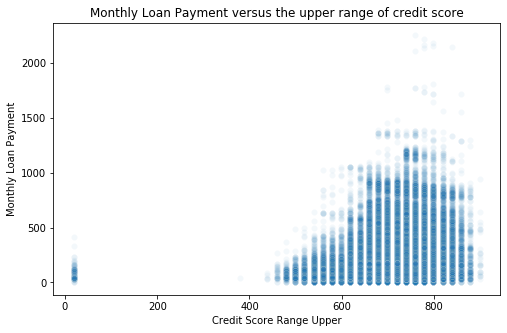

In [31]:
#Monthly Loan Payment and credit score
plt.figure(figsize=[8, 5])
sb.scatterplot(x="CreditScoreRangeUpper", y="MonthlyLoanPayment", data=df_loan, alpha = 0.05);
plt.title('Monthly Loan Payment versus the upper range of credit score', fontsize = 12);
plt.xlabel('Credit Score Range Upper');
plt.ylabel('Monthly Loan Payment');

> Monthly payment and original ammount of the loan versus credit score doas nor revil so much useful relationship. 

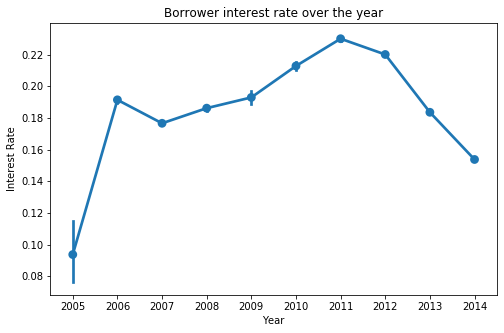

In [32]:
## plots the pointplot for year vs BorrowerRate
plt.figure(figsize = [8,5])
sb.pointplot(data=df_loan, x=df_loan.LoanOriginationDate.dt.year, y="BorrowerRate");
plt.title('Borrower interest rate over the year', fontsize = 12);
plt.ylabel('Interest Rate');
plt.xlabel('Year');

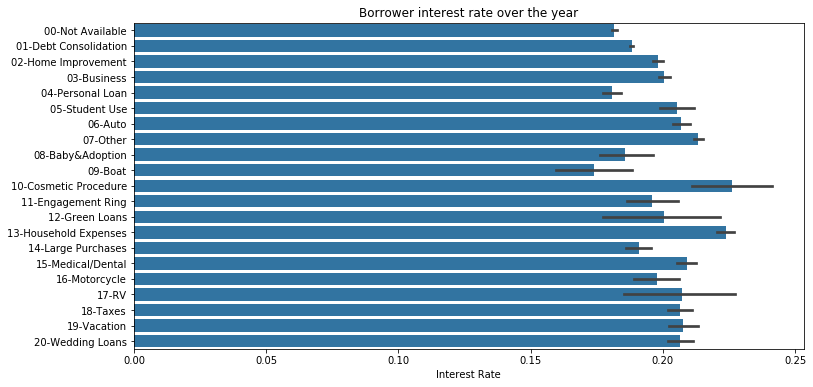

In [33]:
#Variation of Interest rate in different categories.
plt.figure(figsize = (12,6))
sb.barplot(data=df_loan, y="ListingCategory", x="BorrowerRate", color = base_color);
plt.title('Borrower interest rate over the year');
plt.ylabel('');
plt.xlabel('Interest Rate');

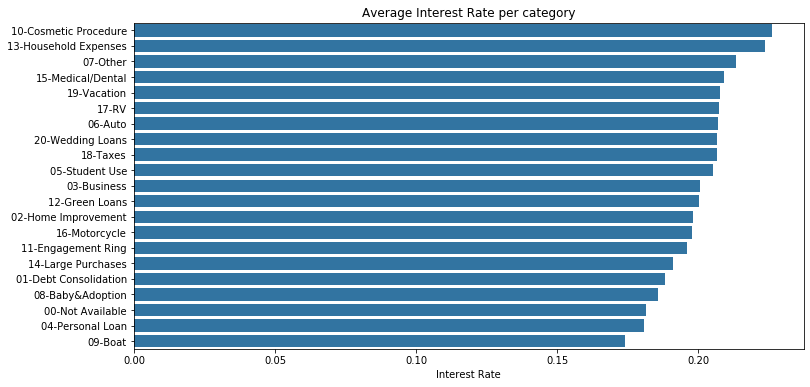

In [34]:
df = df_loan.groupby(['ListingCategory']).BorrowerRate.mean()
df = df.reset_index().sort_values(by="BorrowerRate",ascending=False)
df = df.reset_index(drop=True)
df['ListingCategory'] = df.ListingCategory.astype(str)
plt.figure(figsize = (12,6))
color = sb.color_palette()[0]
sb.barplot(x = "BorrowerRate",y = "ListingCategory",data = df,color=color)
plt.xlabel("Interest Rate")
plt.ylabel('')
plt.title("Average Interest Rate per category");

> This graph shows the variation of the interest rates in different categories of the loans. 

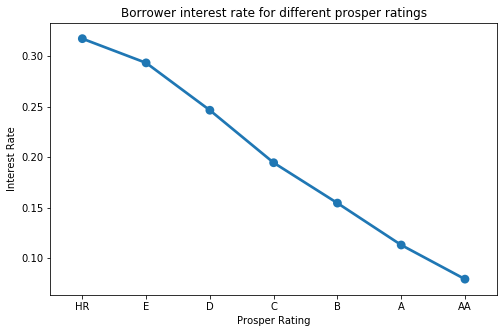

In [35]:
## plots the pointplot for year vs BorrowerRate
plt.figure(figsize = [8,5]);
sb.pointplot(data=df_loan, x=df_loan.ProsperRating, y="BorrowerRate");
plt.title('Borrower interest rate for different prosper ratings', fontsize = 12);
plt.ylabel('Interest Rate');
plt.xlabel('Prosper Rating');

> Shows a strong relationship between the borrower's rating and Interest rate of the loan. here the average interest rates are shown. Boxplots and violin plots are drawn for better understanding.

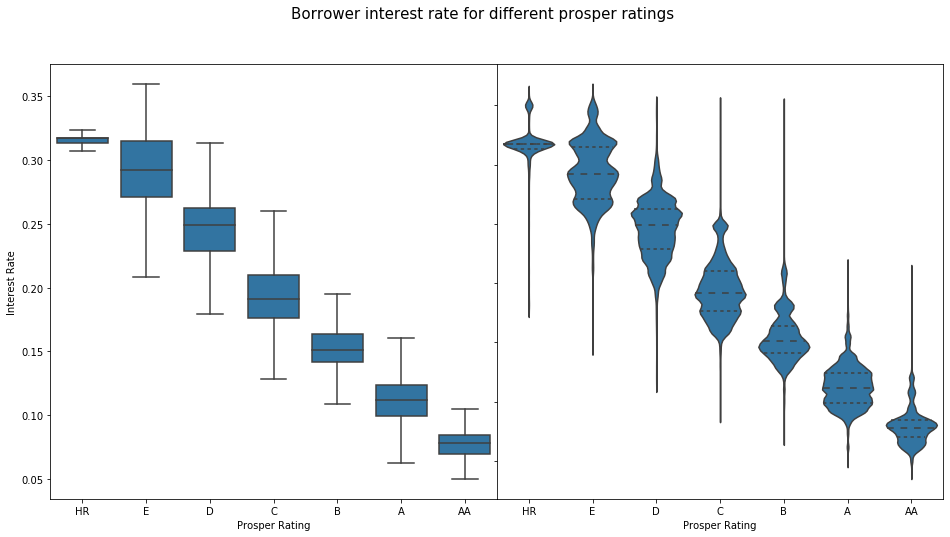

In [36]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=False, figsize = [16,8])
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig, wspace =0)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
fig.suptitle('Borrower interest rate for different prosper ratings', fontsize = 15);
sb.boxplot(df_loan.ProsperRating,df_loan.BorrowerRate, showfliers=False, ax = ax1,  color = base_color);
sb.violinplot(df_loan.ProsperRating,df_loan.BorrowerRate, color = base_color, inner = 'quartile',\
             scale = 'width', ax = ax2);
ax1.set_ylabel('Interest Rate')
ax1.set_xlabel('Prosper Rating')
ax2.set_xlabel('Prosper Rating')
ax2.label_outer()

> Also these plots approve that the better the prosper rating, the lower the interest rate.

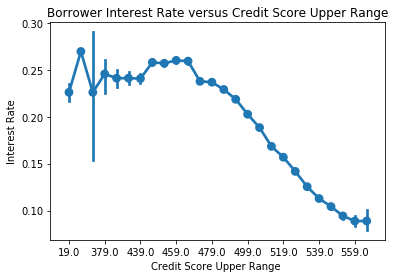

In [37]:
## plots the pointplot for year vs BorrowerRate
sb.pointplot(data=df_loan, x=df_loan.CreditScoreRangeUpper, y="BorrowerRate");
plt.title('Borrower Interest Rate versus Credit Score Upper Range');
plt.ylabel('Interest Rate');
plt.xlabel('Credit Score Upper Range ');
plt.locator_params(axis='x', nbins=10)

> Same as Prsoper rating, The higher the credit score the lower the interest rate.

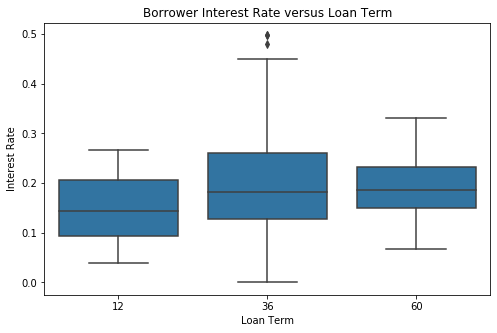

In [38]:
plt.figure(figsize = [8,5])
sb.boxplot(df_loan.Term,df_loan.BorrowerRate,  color = base_color);
plt.title('Borrower Interest Rate versus Loan Term', fontsize = 12);
plt.ylabel('Interest Rate');
plt.xlabel('Loan Term');

In [39]:
df_loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

> Since the number of the loans in each Term value is too different, we are not able to make solid comparison.

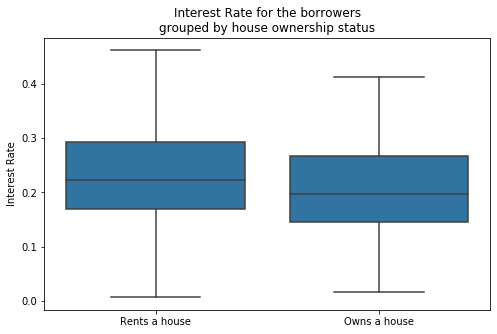

In [40]:
#Interest Rate vs owning house status
plt.figure(figsize = [8,5])
sb.boxplot(df_loan.IsBorrowerHomeowner,df_loan.BorrowerAPR, showfliers=False,  color = base_color);
plt.title('Interest Rate for the borrowers\ngrouped by house ownership status', fontsize = 12);
plt.ylabel('Interest Rate');
plt.xlabel('');
plt.xticks([0,1],['Rents a house', 'Owns a house']);

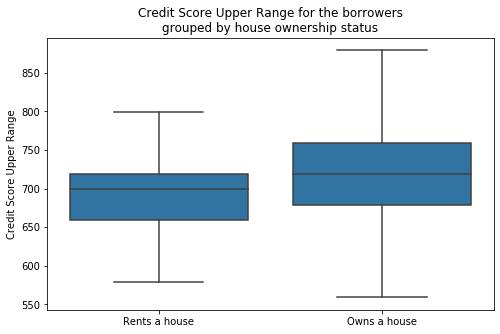

In [41]:
#Credit score vs owning house status
plt.figure(figsize = [8,5])
sb.boxplot(df_loan.IsBorrowerHomeowner,df_loan.CreditScoreRangeUpper, showfliers=False,  color = base_color);
plt.title('Credit Score Upper Range for the borrowers\ngrouped by house ownership status', fontsize = 12);
plt.ylabel('Credit Score Upper Range');
plt.xlabel('');
plt.xticks([0,1],['Rents a house', 'Owns a house']);

> Borrowers who own a house ten to have slightly higher credit scores as well.

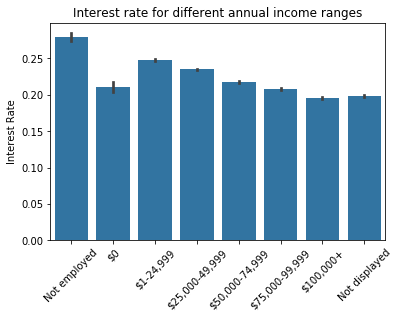

In [42]:
#Interest rate for different Income ranges
sb.barplot(data = df_loan,x='IncomeRange', y = 'BorrowerAPR',color = base_color);
plt.xticks(rotation = 45);
plt.title('Interest rate for different annual income ranges');
plt.ylabel('Interest Rate');
plt.xlabel('');

> It kind of shows a declining trend in Interest rate with increasing in annual income range.

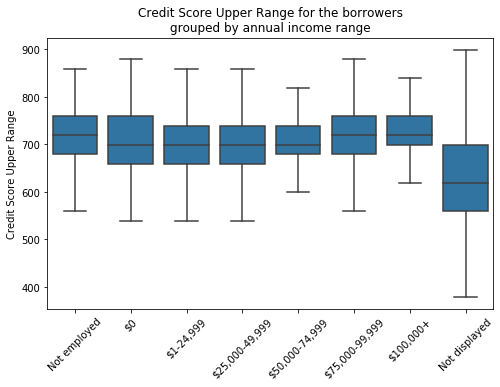

In [43]:
#Credit Score Upper Range for different income ranges 
plt.figure(figsize=[8, 5])
sb.boxplot(df_loan.IncomeRange,df_loan.CreditScoreRangeUpper, showfliers=False,  color = base_color);
plt.title('Credit Score Upper Range for the borrowers\ngrouped by annual income range', fontsize = 12);
plt.ylabel('Credit Score Upper Range');
plt.xlabel('');
plt.xticks(rotation = 45);

> Nothing Solid to drive from this graph.

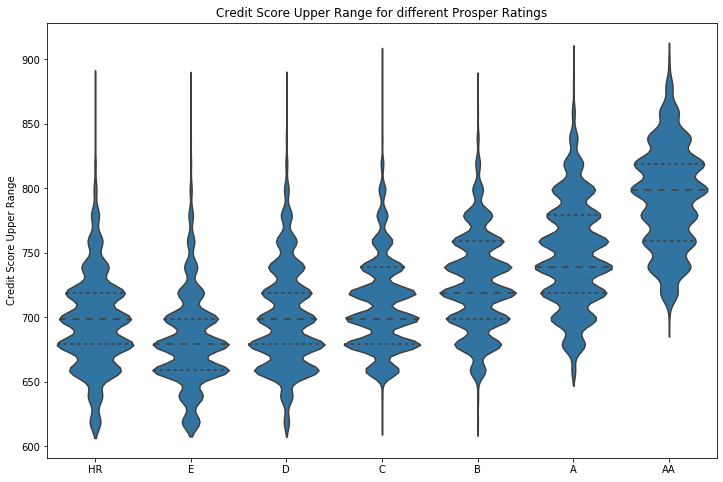

In [44]:
# Credit Score Upper Range distribution in different prosper ratings.
plt.figure(figsize=[12, 8])
sb.violinplot(df_loan.ProsperRating,df_loan.CreditScoreRangeUpper, color = base_color, inner = 'quartile',\
             scale = 'width');
plt.title('Credit Score Upper Range for different Prosper Ratings');
plt.ylabel('Credit Score Upper Range');
plt.xlabel('');

> These violin graphs and the dashed lines inside them shows that better prosper rating people have higher credit score. Kind of makes sense since probably the prosper rating system have given a good value to the credit score.

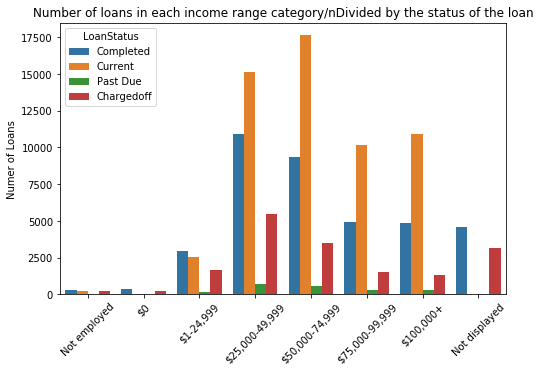

In [45]:
#
plt.figure(figsize = [8,5])
sb.countplot(data = df_loan, x = 'IncomeRange', hue='LoanStatus');
plt.xticks(rotation = 45);
plt.title('Number of loans in each income range category/nDivided by the status of the loan');
plt.ylabel('Numer of Loans');
plt.xlabel('');

> Comparing absolute values is not so informative. We'd better try relative values. [This Post](https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group) on Stackoverflow helped me to do so.

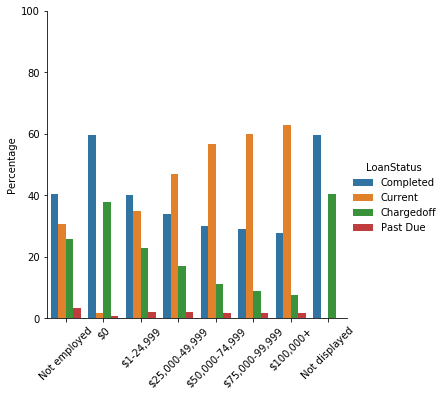

In [46]:
x,y = 'IncomeRange', 'LoanStatus'

df1 = df_loan.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.xticks(rotation = 45);
plt.xlabel('');
plt.ylabel('Percentage');

> The percentage of chargedoff loans decrease by increasing the annual income category.

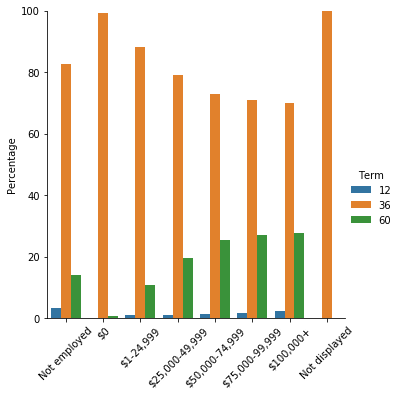

In [47]:
x,y = 'IncomeRange', 'Term'

df1 = df_loan.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.xticks(rotation = 45);
plt.xlabel('');
plt.ylabel('Percentage');

> This graph shows that the higher income ranges tend to have more longer term loans so it can explain the trend in their loan status that have higher current loans and fewer completed ones compared to the previous income range

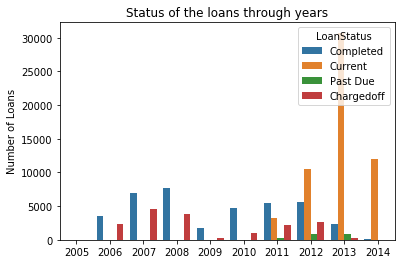

In [48]:
sb.countplot(data = df_loan, x = df_loan.LoanOriginationDate.dt.year, hue = 'LoanStatus');
plt.title('Status of the loans through years');
plt.ylabel('Number of Loans');
plt.xlabel('');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have tried to discuss these finding after each graph since it is easier to look at the graph and read.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The strong negative relationship between prosper rating and interest rate was interesting.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

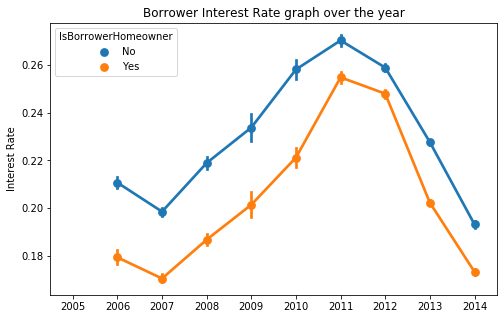

In [49]:
## plots the pointplot for year vs BorrowerRate and weather they have house or no.
plt.figure(figsize = [8,5])
sb.pointplot(data=df_loan, x=df_loan.LoanOriginationDate.dt.year, y="BorrowerAPR", hue="IsBorrowerHomeowner");
plt.title('Borrower Interest Rate graph over the year',fontsize=12);
plt.ylabel('Interest Rate');
plt.xlabel('');

> The change has been the same for the both group but generally people with house pay lower interests.

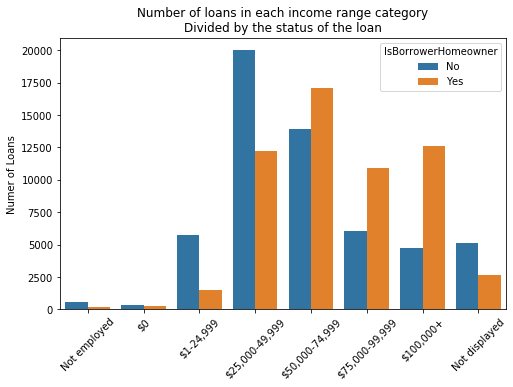

In [50]:
# Number of house owners in each group of Income range. 
plt.figure(figsize = [8,5])
sb.countplot(data = df_loan, x = 'IncomeRange', hue='IsBorrowerHomeowner');
plt.xticks(rotation = 45);
plt.title('Number of loans in each income range category\nDivided by the status of the loan', fontsize = 12);
plt.ylabel('Numer of Loans');
plt.xlabel('');

> Even if the above graph is a bivariant observation, but I had to make it here to see how does the number of home owners change in each income category group.

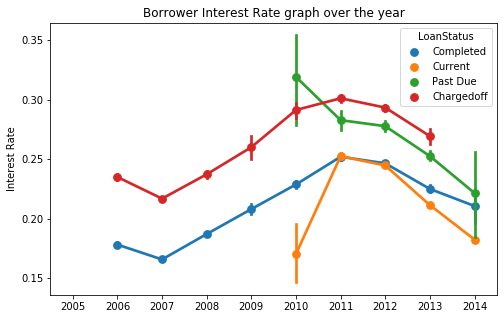

In [51]:
# Interest rate through years for different status of the loans
plt.figure(figsize = [8,5])
sb.pointplot(data=df_loan, x=df_loan.LoanOriginationDate.dt.year, y="BorrowerAPR", hue="LoanStatus");
plt.title('Borrower Interest Rate graph over the year',fontsize=12);
plt.ylabel('Interest Rate');
plt.xlabel('');

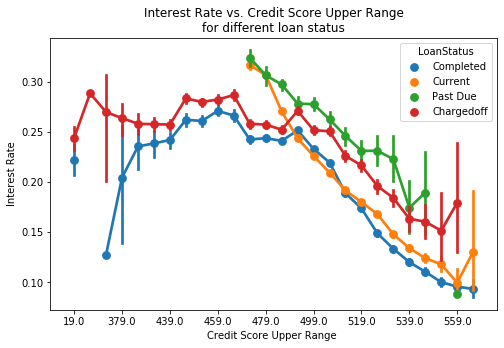

In [52]:
# # Interest rate versus credit score for different status of the loans
plt.figure(figsize = [8,5])
sb.pointplot(data=df_loan, x=df_loan.CreditScoreRangeUpper, y="BorrowerAPR", hue="LoanStatus");
plt.title('Interest Rate vs. Credit Score Upper Range\nfor different loan status',fontsize=12);
plt.ylabel('Interest Rate');
plt.xlabel('Credit Score Upper Range ');
plt.locator_params(axis='x', nbins=10)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The fact that home owners had lower interest rates on their loans through years was interesting. But then looking at the fact that higher income ranges had more percentage of home owners, made this finding be more of a correlation rather than cause and effect one.

### Were there any interesting or surprising interactions between features?

> The fact that completed laons had lower interest rate through all the credit score range and through the years was an interesting observation.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [53]:
#Since I have performed several cleaning actions on the data base I will save it as a CSV file for Explanation part.
df_loan.to_csv('Loan.csv', index = False)